In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.1.3
1.4.1


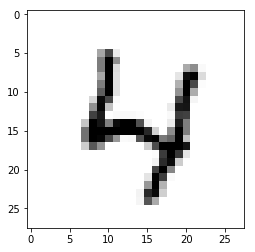

4


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img1 = x_train[314].reshape(-1, 28*28).astype('float32') / 255.0
img1label = y_train[314]

plt.imshow(img1.reshape(28,28), cmap=plt.cm.binary)
plt.show()
print(img1label)

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 1.3977 - acc: 0.5521 - val_loss: 0.5190 - val_acc: 0.8436
Epoch 2/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.4377 - acc: 0.8681 - val_loss: 0.3661 - val_acc: 0.8884
Epoch 3/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.3198 - acc: 0.9065 - val_loss: 0.2791 - val_acc: 0.9207
Epoch 4/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2562 - acc: 0.9258 - val_loss: 0.2268 - val_acc: 0.9343
Epoch 5/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.2156 - acc: 0.9376 - val_loss: 0.2001 - val_acc: 0.9431
Epoch 6/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.1848 - acc: 0.9462 - val_loss: 0.1759 - val_acc: 0.9505
Epoch 7/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.1620 - acc: 0.9531 - val_loss: 0.1584 - val_acc

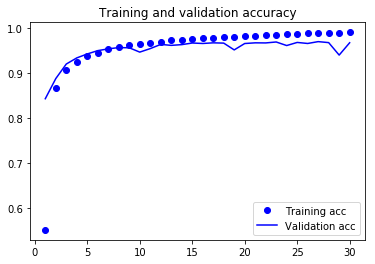

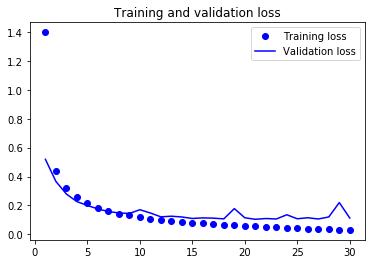

In [5]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()